In [8]:
%load_ext autoreload
%autoreload 2
import numpy as np
from hamiltonians.utils.graph_utils import create_random_weighted_graph
from hamiltonians.problems import MaxCutProblem
from hamiltonians.solution_analysis.maxcut import inspect_solution_landscape, plot_solution_landscape

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Defining the graph
Initialize a simple weighted graph where each edge has an initial weight between 0.1 and 1.0. Each edge has two additional parameters, initialized between -1.0 and 1.0 each.

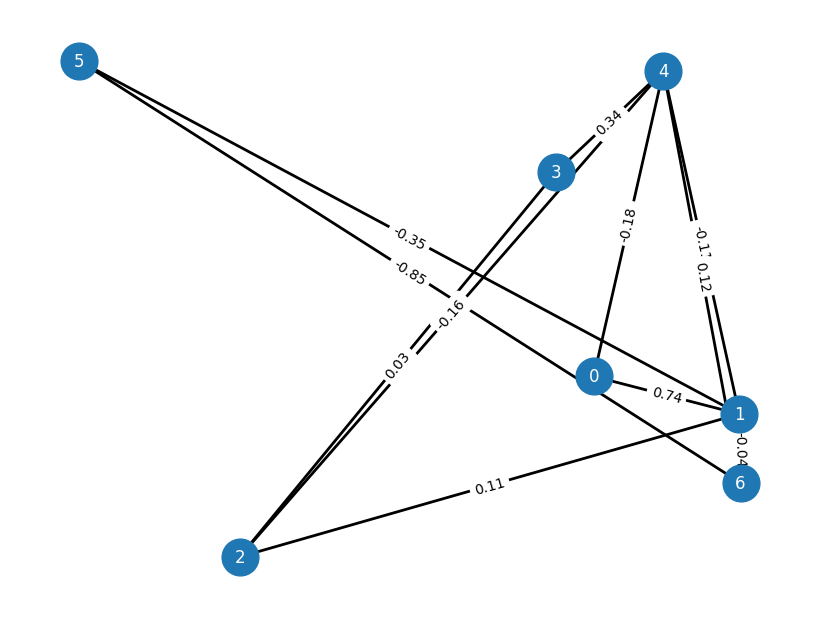

In [42]:
g = create_random_weighted_graph(n_nodes=7, edge_probability=0.6, n_edge_params=3, init_weight_range=(-1.0, 1.0), edge_param_range=(-1.0, 1.0), seed=25)
maxcut = MaxCutProblem(g)
maxcut.visualize_graph()


### Inspecting the Solution Landscape
Instead of modifying the problem configuration for multiple values of the Hamiltonian parameter / Lambda manually, it is more convenient to use the inspect_solution_landscape() function. Through this, one can apply a parameter modifier (such a s a quadratic edge scaling) for a range of values. The inspect_solution_landscape() function then calculates the optimal cut values for each value in the defined interval. In the following example, the parameter "scaling_factor" is the Hamiltonian parameter Lambda.

In [49]:
# 11 equidistant points in the interval [-2.0, 2.0]
scaling_factors = np.linspace(-2.0, 2.0, 22)

landscape_data = inspect_solution_landscape(
    problem=maxcut,
    modifier_name="quadratic_edge_scaling",  # Qubit edge weight modifier function
    param_name="scaling_factor",
    param_values=scaling_factors
)

print(landscape_data)

{'param_values': array([-2.        , -1.80952381, -1.61904762, -1.42857143, -1.23809524,
       -1.04761905, -0.85714286, -0.66666667, -0.47619048, -0.28571429,
       -0.0952381 ,  0.0952381 ,  0.28571429,  0.47619048,  0.66666667,
        0.85714286,  1.04761905,  1.23809524,  1.42857143,  1.61904762,
        1.80952381,  2.        ]), 'cut_values': [1.4743001064771817, 1.412405996471494, 1.3452594870209373, 1.272860578125513, 1.19520926978522, 1.1123055620000586, 1.0241494547700292, 1.0766486110015407, 1.1156542497959134, 1.0730531420978597, 1.1585191751489432, 1.2709794507300471, 1.2377040549916878, 1.0586929879338647, 0.9467330278552415, 0.8627595681205288, 0.8698667122232009, 1.1132098123353542, 1.3678420089603713, 1.633763302098253, 1.9109736917489994, 2.199473177912611]}


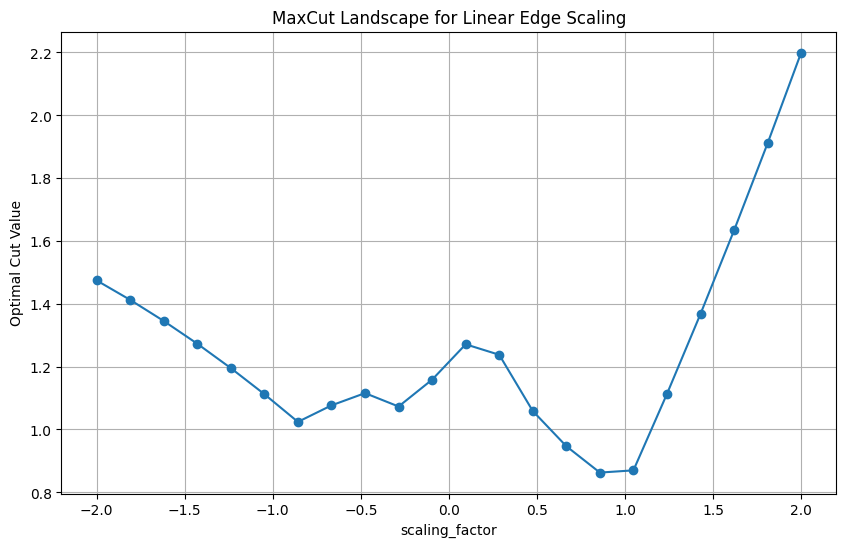

In [50]:
# 3. Plot the solution landscape
plot_solution_landscape(
    landscape_data=landscape_data,
    param_name="scaling_factor",
    title="MaxCut Landscape for Linear Edge Scaling"
)